In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
base_dir = '/content/drive/My Drive/Colab Notebooks/Datasett/'
!ls "/content/drive/My Drive/Colab Notebooks/Datasett/"

bahan  latih  validasi


In [9]:
# menentukan direktori
bahan_dir = os.path.join (base_dir, 'bahan')
train_dir = os.path.join (base_dir, 'latih')
validation_dir = os.path.join (base_dir, 'validasi')

In [10]:
#menentukan direktori bahan
duaribu_dir = os.path.join (bahan_dir, 'duaribu/')
limaribu_dir = os.path.join (bahan_dir, 'limaribu/')
sepuluhribu_dir = os.path.join (bahan_dir, 'sepuluhribu/')
duapuluhribu_dir = os.path.join (bahan_dir, 'duapuluhribu/')

print('Jumlah Data Train Tiap Kelas')
print('Jumlah gambar duaribu :', len(os.listdir(duaribu_dir)))
print('Jumlah gambar limaribu :', len(os.listdir(limaribu_dir)))
print('Jumlah gambar sepuluhribu :', len(os.listdir(sepuluhribu_dir)))
print('Jumlah gambar duapuluhribu :', len(os.listdir(duapuluhribu_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar duaribu : 20
Jumlah gambar limaribu : 20
Jumlah gambar sepuluhribu : 20
Jumlah gambar duapuluhribu : 20


In [11]:
# Direktori isi latih/training
train_duaribu = os.path.join(train_dir, 'duaribu/')
train_limaribu = os.path.join(train_dir, 'limaribu/')
train_sepuluhribu = os.path.join(train_dir, 'sepuluhribu/')
train_duapuluhribu = os.path.join(train_dir, 'duapuluhribu/')

# Direktori isi validasi
validation_duaribu = os.path.join(validation_dir, 'duaribu/')
validation_limaribu = os.path.join(validation_dir, 'limaribu/')
validation_sepuluhribu = os.path.join(validation_dir, 'sepuluhribu/')
validation_duapuluhribu = os.path.join(validation_dir, 'duapuluhribu/')


Siapkan Dataset

In [12]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os. listdir(source) )
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random. sample(os. listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_files = source + i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.9

#pembagian Training dan Validasi
source_00 = duaribu_dir
train_00 = train_duaribu
val_00 = validation_duaribu
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = limaribu_dir
train_01 = train_limaribu
val_01 = validation_limaribu
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = sepuluhribu_dir
train_02 = train_sepuluhribu
val_02 = validation_sepuluhribu
train_val_split(source_02, train_02, val_02, train_ratio)

source_03 = duapuluhribu_dir
train_03 = train_duapuluhribu
val_03 = validation_duapuluhribu
train_val_split(source_03, train_03, val_03, train_ratio)

Pre Processing

In [14]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

Target

In [16]:
train_generator = train_datagen. flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen. flow_from_directory (
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 72 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()

Model CNN

In [27]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(4, activation='softmax'),
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [36]:
from tensorflow.keras import metrics
model.compile(loss = 'categorical_crossentropy',
               optimizer = "Adam",
               metrics = ['accuracy' ])

In [38]:
history = model.fit(
            train_generator,
            steps_per_epoch = 2,
            epochs = 25,
            validation_data = val_generator,
            validation_steps = 1,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/25
2/2 [==============================] - 2s 1s/step - loss: 1.3938 - accuracy: 0.2500 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 2/25
2/2 [==============================] - 2s 1s/step - loss: 1.3835 - accuracy: 0.2000 - val_loss: 1.3871 - val_accuracy: 0.2500
Epoch 3/25
2/2 [==============================] - 3s 2s/step - loss: 1.3949 - accuracy: 0.2000 - val_loss: 1.3867 - val_accuracy: 0.2500
Epoch 4/25
2/2 [==============================] - 3s 2s/step - loss: 1.3765 - accuracy: 0.3500 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 5/25
2/2 [==============================] - 2s 1s/step - loss: 1.3888 - accuracy: 0.2000 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 6/25
2/2 [==============================] - 2s 1s/step - loss: 1.3846 - accuracy: 0.2000 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 7/25
2/2 [==============================] - 2s 1s/step - loss: 1.3894 - accuracy: 0.2500 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 8/25
2/2 [=========================

Tingkat Akurasi & Loss Model

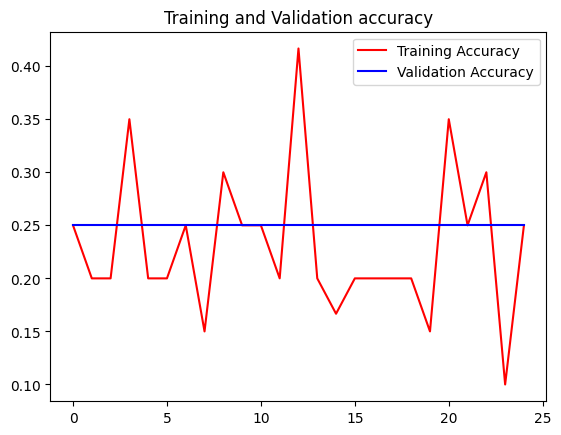

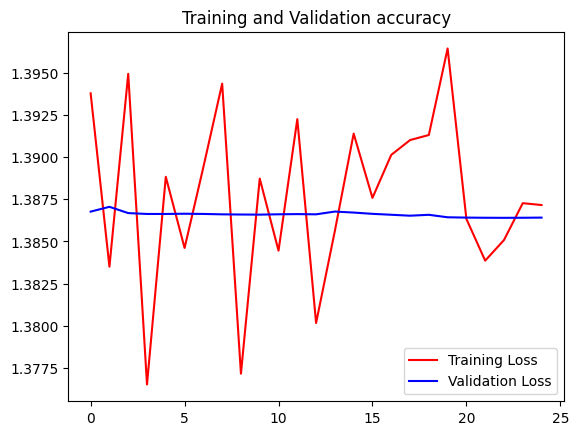

In [40]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

Coba Klasifikasi

Saving 2RIBU.jpg to 2RIBU.jpg
1/1 [==============================] - 0s 158ms/step
2RIBU.jpg
This image belongs to class duaribu


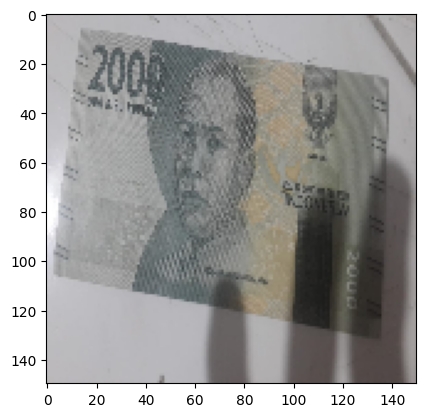

In [41]:
import numpy as np
import keras
import tensorflow as tf
import keras.utils as image
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = keras.utils.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(fn)

    class_list = os.listdir(train_dir)

    predicted_class_index = np.argmax(classes, axis=1)[0]
    predicted_class = class_list[predicted_class_index]
    print('This image belongs to class', predicted_class)